# Homework 2 - IEEE Fraud Detection

In [1]:

# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/ieee-fraud-detection/train_identity.csv
/kaggle/input/ieee-fraud-detection/test_identity.csv
/kaggle/input/ieee-fraud-detection/test_transaction.csv
/kaggle/input/ieee-fraud-detection/sample_submission.csv
/kaggle/input/ieee-fraud-detection/train_transaction.csv


For all parts below, answer all parts as shown in the Google document for Homework 2. Be sure to include both code that justifies your answer as well as text to answer the questions. We also ask that code be commented to make it easier to follow.

## Part 1 - Fraudulent vs Non-Fraudulent Transaction

In [2]:
# TODO: code and runtime results

import pandas as pd
train_transaction = pd.read_csv('/kaggle/input/ieee-fraud-detection/train_transaction.csv')
train_transaction.head()


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
isFraud = train_transaction.loc[train_transaction['isFraud']==1]
isNotFraud = train_transaction.loc[train_transaction['isFraud']==0]

In [4]:
isFraud.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
203,2987203,1,89760,445.000,W,18268,583.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
240,2987240,1,90193,37.098,C,13413,103.0,185.0,visa,137.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243,2987243,1,90246,37.098,C,13413,103.0,185.0,visa,137.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
245,2987245,1,90295,37.098,C,13413,103.0,185.0,visa,137.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
288,2987288,1,90986,155.521,C,16578,545.0,185.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
cols = [col for col in isFraud.columns if col in ['TransactionID', 'isFraud', 'TransactionAmt','TransactionDT','ProductCD','card4','card6','P_emaildomain','R_emaildomain','addr1','addr2','dist1','dist2']]
isFraud1 = isFraud[cols]
isFraud1.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card4,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain
203,2987203,1,89760,445.000,W,visa,credit,251.0,87.0,NaN,NaN,aol.com,NaN
240,2987240,1,90193,37.098,C,visa,credit,NaN,NaN,NaN,NaN,hotmail.com,hotmail.com
243,2987243,1,90246,37.098,C,visa,credit,NaN,NaN,NaN,NaN,hotmail.com,hotmail.com
245,2987245,1,90295,37.098,C,visa,credit,NaN,NaN,NaN,NaN,hotmail.com,hotmail.com
288,2987288,1,90986,155.521,C,visa,credit,NaN,NaN,NaN,NaN,outlook.com,outlook.com


In [7]:
df1 = pd.read_csv('/kaggle/input/ieee-fraud-detection/train_identity.csv')
df1.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [8]:
cols = [col for col in df1.columns if col in ['DeviceType','DeviceInfo']]
df2 = df1[cols]
df2.head()

,DeviceType,DeviceInfo
0,mobile,SAMSUNG SM-G892A Build/NRD90M
1,mobile,iOS Device
2,desktop,Windows
3,desktop,NaN
4,desktop,MacOS


In [9]:
isFraud = pd.concat([df2,isFraud1], sort='False')
isFraud.tail()

,DeviceInfo,DeviceType,P_emaildomain,ProductCD,R_emaildomain,TransactionAmt,TransactionDT,TransactionID,addr1,addr2,card4,card6,dist1,dist2,isFraud
590361,NaN,NaN,yahoo.com,W,NaN,1224.000,15807368.0,3577361.0,191.0,87.0,visa,debit,26.0,NaN,1.0
590364,NaN,NaN,hotmail.com,C,hotmail.com,69.964,15807516.0,3577364.0,NaN,NaN,mastercard,debit,NaN,24.0,1.0
590368,NaN,NaN,hotmail.com,H,hotmail.com,100.000,15807677.0,3577368.0,299.0,87.0,american express,credit,NaN,NaN,1.0
590372,NaN,NaN,yahoo.com,W,NaN,117.000,15807758.0,3577372.0,272.0,87.0,visa,credit,NaN,NaN,1.0
590526,NaN,NaN,gmail.com,R,gmail.com,250.000,15810876.0,3577526.0,272.0,87.0,visa,credit,NaN,NaN,1.0


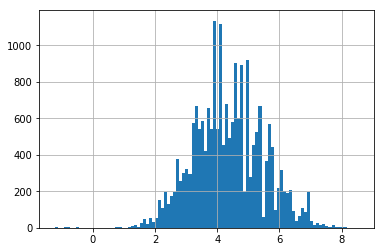

In [10]:
import numpy as np
np.log(isFraud['TransactionAmt']).hist(bins=100)

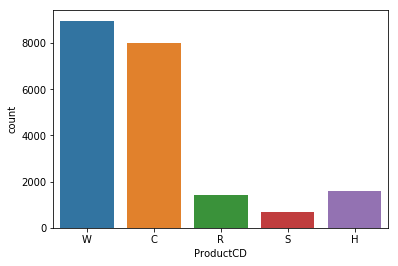

In [11]:
import seaborn as sns
sns.countplot(x='ProductCD', data= isFraud)

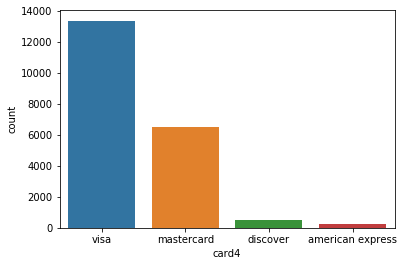

In [12]:
sns.countplot(x='card4', data= isFraud)

Visa cards have the highest instances of Fraud. But, Visa is also the most used company for cards. 

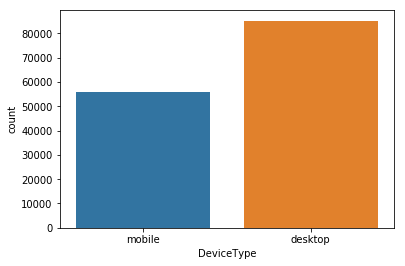

In [13]:
sns.countplot(x='DeviceType', data= isFraud)

Write your answer here

## Part 2 - Transaction Frequency

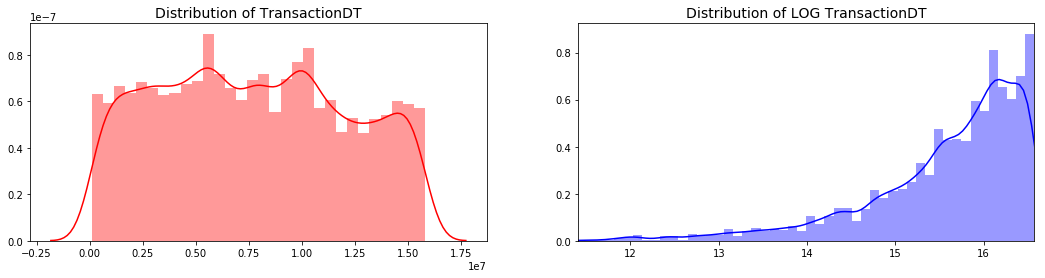

In [14]:
# TODO: code to generate the frequency graph
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(18,4))

#isFraud['TransactionDT'] = pd.to_numeric(isFraud['TransactionDT'], errors='coerce')
isFraud2 =isFraud 
isFraud2 = isFraud2.dropna(subset=['TransactionDT'])

time_val = isFraud2['TransactionDT'].values

sns.distplot(time_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of TransactionDT', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

sns.distplot(np.log(time_val), ax=ax[1], color='b')
ax[1].set_title('Distribution of LOG TransactionDT', fontsize=14)
ax[1].set_xlim([min(np.log(time_val)), max(np.log(time_val))])

plt.show()

Write your answer here

In [15]:
isFraud['Time'] = np.round(isFraud['TransactionDT']/(60*60),0)
isFraud['Time'] = np.round(isFraud['Time']%24,0)
isFraud.loc[isFraud['Time']==10]
l3 = []
l3 = isFraud['Time'].tolist()
plt.bar(isFraud['Time'], isFraud['addr2'], align='center', alpha=0.5)



<BarContainer object of 164896 artists>

Error in callback <function flush_figures at 0x7f2100abc840> (for post_execute):


KeyboardInterrupt: 

In [17]:
sns.countplot(x='DaysFromStart', data= isFraud)
isFraud['DaysFromStart'].unique()

ValueError: Could not interpret input 'DaysFromStart'

## Part 3 - Product Code

In [18]:
# TODO: code to analyze prices for different product codes
isFraud1 = isFraud
isFraud1['Rank'] = isFraud1['TransactionAmt'].rank(ascending=0)
#isFraud1.sort_values('TransactionAmt', inplace=True)
isFraud1["group_rank"] = isFraud1.groupby("ProductCD")["TransactionAmt"].rank(ascending=0,method='dense')
isFraud1.head()

,DeviceInfo,DeviceType,P_emaildomain,ProductCD,R_emaildomain,TransactionAmt,TransactionDT,TransactionID,addr1,addr2,card4,card6,dist1,dist2,isFraud,Time,Rank,group_rank
0,SAMSUNG SM-G892A Build/NRD90M,mobile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,iOS Device,mobile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Windows,desktop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,desktop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MacOS,desktop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We see on ranking that the ProductCD which is W is most priced while that of C is least priced.

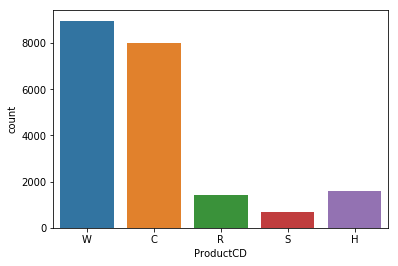

In [19]:
sns.countplot(x='ProductCD', data = isFraud)

<BarContainer object of 5 artists>

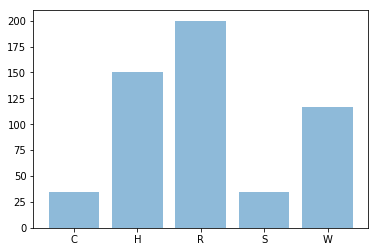

In [20]:
df2 = isFraud.groupby(['ProductCD']).median()
df2.head()
df3 = df2['TransactionAmt']
l1= df3.index.tolist()
l2 = []
l2.append(df3[0]) 
l2.append(df3[1]) 
l2.append(df3[2]) 
l2.append(df3[3]) 
l2.append(df3[4])
plt.bar(l1, l2, align='center', alpha=0.5)

#plt.show()

We also see that W is the most bought thing which people have been fauded off which might make it valueable and as can be seen before, it was also one of the most expensive. 

## Part 4 - Correlation Coefficient

In [21]:
# TODO: code to calculate correlation coefficient
isFraud4 = isFraud
isFraud4 = isFraud4.dropna(subset = ['TransactionDT'])
isFraud4 = isFraud4.dropna(subset = ['TransactionAmt'])
import scipy.stats as sp
spcor = sp.pearsonr(isFraud4['TransactionDT'], isFraud4['TransactionAmt'])
spcor1 = sp.spearmanr(isFraud4['TransactionDT'], isFraud4['TransactionAmt'])
cor = np.corrcoef(isFraud4['TransactionDT'], isFraud4['TransactionAmt'])
#cor
spcor

(0.03975538815285562, 1.0867383084387185e-08)

Write your answer here

## Part 5 - Interesting Plot

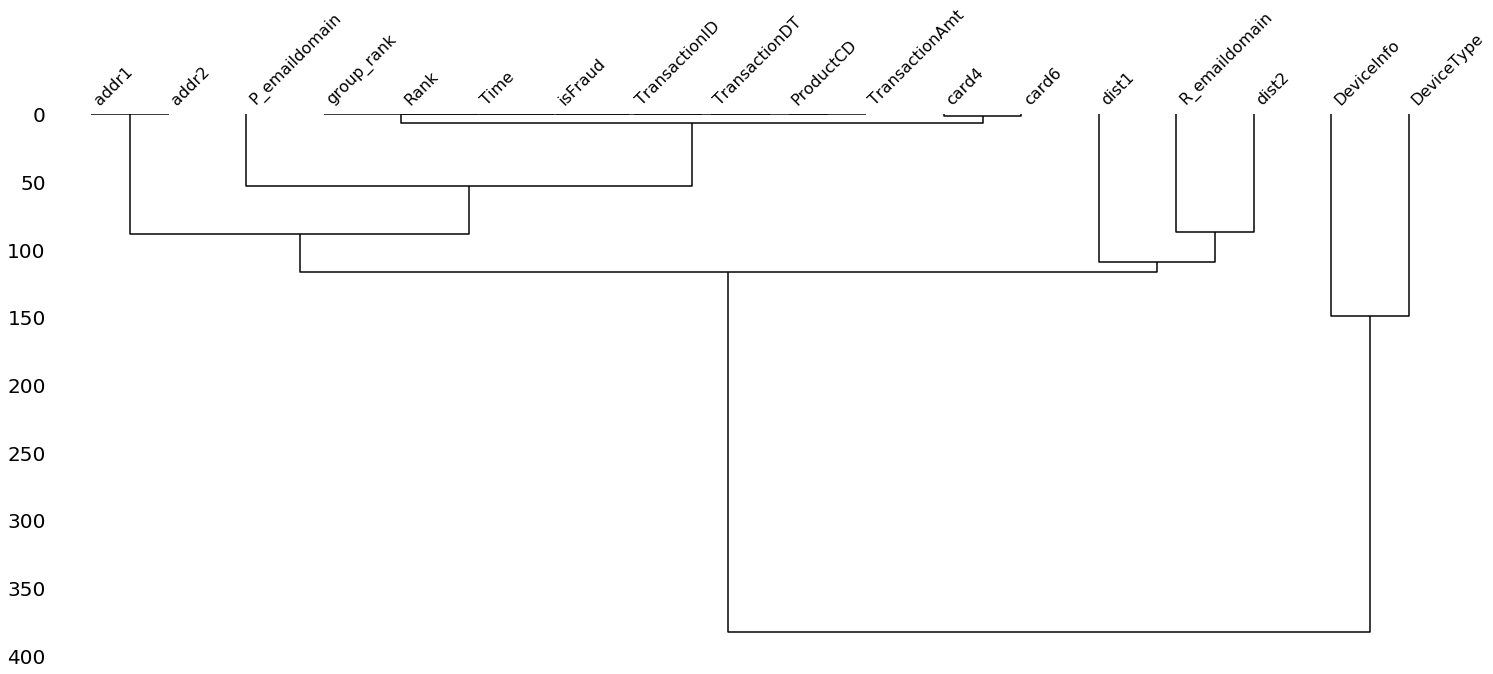

In [22]:
# TODO: code to generate the plot here.

import missingno as msno
msno.dendrogram(isFraud)

One method of finding correlation is the dendogram. Here, the hirerchical clustering algorithm which can be used to find how the different attributes are related to each other can be found. From the plot, we can see and as expected, DeviceInfo and DeviceType are highly corelated and hence appear together. The formula used for this is D=1-C wherein the C is the correlation while the D shows the distance. This means that the higher the correlation, the lower will be the distance between the correlated values. addr1, addr2 seem also correlated. These can also be verified by a heatmap plot. 

## Part 6 - Prediction Model

In [ ]:
import pandas as pd
test_transaction = pd.read_csv('/kaggle/input/ieee-fraud-detection/test_transaction.csv')
cols = [col for col in test_transaction.columns if col in ['TransactionID', 'TransactionAmt','TransactionDT','ProductCD','card4','card6','P_emaildomain','R_emaildomain','addr1','addr2','dist1','dist2']]
test_X = test_transaction[cols]
test_X.head()



In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()


In [ ]:
import pandas as pd
train_transaction = pd.read_csv('/kaggle/input/ieee-fraud-detection/train_transaction.csv')
cols = [col for col in test_transaction.columns if col in ['TransactionID', 'TransactionAmt','TransactionDT','ProductCD','card4','card6','P_emaildomain','R_emaildomain','addr1','addr2','dist1','dist2']]
X_train = train_transaction[cols]
X_train.head()

In [ ]:
# TODO: code for your final model
import pandas as pd
train_transaction = pd.read_csv('/kaggle/input/ieee-fraud-detection/train_transaction.csv')
cols = [col for col in train_transaction.columns if col in ['isFraud']]
y_train = train_transaction[cols]
y_train.head()


In [ ]:
X_train.fillna(-1, inplace=True)
y_train.fillna(-1, inplace=True)
test_X.fillna(-1, inplace=True)


In [ ]:
X_train['card6'] = pd.factorize(X_train['card6'])[0]+1
X_train['card4'] = pd.factorize(X_train['card4'])[0]+1
X_train['P_emaildomain'] = pd.factorize(X_train['P_emaildomain'])[0]+1
X_train['R_emaildomain'] = pd.factorize(X_train['R_emaildomain'])[0]+1
X_train['ProductCD'] = pd.factorize(X_train['ProductCD'])[0]+1
#X_train
test_X['card6'] = pd.factorize(test_X['card6'])[0]+1
test_X['card4'] = pd.factorize(test_X['card4'])[0]+1
test_X['P_emaildomain'] = pd.factorize(test_X['P_emaildomain'])[0]+1
test_X['R_emaildomain'] = pd.factorize(test_X['R_emaildomain'])[0]+1
test_X['ProductCD'] = pd.factorize(test_X['ProductCD'])[0]+1
test_X

In [ ]:
df4 = pd.read_csv('/kaggle/input/ieee-fraud-detection/test_transaction.csv')

In [ ]:
model.fit(X_train, y_train)
f = model.predict(test_X)

In [ ]:
df8=df4['TransactionID']
d = pd.DataFrame(f)
#df8.append(f)
df8 = pd.concat([df8,d],axis=1)

Write your answer here

## Part 7 - Final Result

Report the rank, score, number of entries, for your highest rank. Include a snapshot of your best score on the leaderboard as confirmation. Be sure to provide a link to your Kaggle profile. Make sure to include a screenshot of your ranking. Make sure your profile includes your face and affiliation with SBU.

Kaggle Link: https://www.kaggle.com/golion/abhaygoyal-dsf/edit/run/21062959

Highest Rank: 5983

Score: 0.5000

Number of entries: 1

INCLUDE IMAGE OF YOUR KAGGLE RANKING
https://drive.google.com/open?id=1ESQQupO9QtFIzao2vqWcagXDFPde5os9